Name: Deep Pawar (A20545137)

Professor: Oleksandr Narykov

Institute: Illinois Institute of Technology

CSP 571: Data Preparation and Analysis

Fall 2024 - Assignment 1

Q. 1. Download ‘Automobile’ dataset from the UCI ML repository
      (https://archive.ics.uci.edu/dataset/10/automobile)

Q. 2. Create pandas dataset with the following columns:

 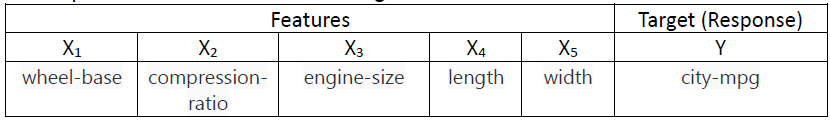

Q. 3. (5 point) Designate the first 60% of data as a training set, the next 20% as a validation set, and the last 20% as a test set. You can keep column Y as a part of dataset or separate it into a stand-alone vector.

In [19]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#Loading dataset into the variable named 'df'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv(url, names=columns, na_values='?')

#Creating the dataset with the given features and target columns
X = df[['wheel-base', 'compression-ratio', 'engine-size', 'length', 'width']]
Y = df['city-mpg']

#Split data into training set as 60%, validation set as 20%, and test set as 20%
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

Q. 4. (10 point) Consider three linear models for the regression problem – linear regression, ridge regression, and LASSO. Fit them with default parameters on the training set and estimate performance on both validation and test sets. Use MSE, Pearson Correlation Coefficient (PCC), and Coefficient of determination (R2) metrics.

In [20]:
#Creating Linear Regression, Ridge Regression and Lasso Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

#Creating a evaluation function to compute MSE, PCC, and R²
def model_evaluation(model, X, Y, set_name):
    predictions = model.predict(X)
    mse = mean_squared_error(Y, predictions)
    pcc, _ = pearsonr(Y, predictions)
    r2 = r2_score(Y, predictions)

    print(f"\nThe Performance on {set_name} set : ")
    print(f"Value of MSE : {mse}")
    print(f"Value of PCC : {pcc}")
    print(f"Value of R²  : {r2}")

for name, model in models.items():
    print(f"\n ----------- {name} ------------")

    #Fitting the model on training set
    model.fit(X_train, Y_train)
    #Performing Evaluation on validation set
    model_evaluation(model, X_val, Y_val, "Validation")
    #Performing Evaluation on test set
    model_evaluation(model, X_test, Y_test, "Test")


 ----------- Linear Regression ------------

The Performance on Validation set : 
Value of MSE : 20.295140049988714
Value of PCC : 0.8227098068087262
Value of R²  : 0.665796806253492

The Performance on Test set : 
Value of MSE : 10.539190179156172
Value of PCC : 0.8760184188938203
Value of R²  : 0.7297272510883063

 ----------- Ridge Regression ------------

The Performance on Validation set : 
Value of MSE : 20.305135742307048
Value of PCC : 0.8226083400357305
Value of R²  : 0.6656322056501818

The Performance on Test set : 
Value of MSE : 10.544284340318582
Value of PCC : 0.8759572745966
Value of R²  : 0.7295966136372916

 ----------- Lasso Regression ------------

The Performance on Validation set : 
Value of MSE : 23.00353047878484
Value of PCC : 0.7949368131887922
Value of R²  : 0.6211973243584833

The Performance on Test set : 
Value of MSE : 11.494502175984902
Value of PCC : 0.8667530890574934
Value of R²  : 0.7052287084999143


Q.5. (20 point) For ridge regression and LASSO investigate the following values of parameter alpha (multiplication coefficient for regularization) on the validation set and its effect on model performance: [0., 0.25, 0.5, 1., 1000.].

Which value gives the best performance on the validation set? Retrain the model with this value and calculate the same metrics on the test set.

In [21]:
#Given Range of alpha values (where alpha will be 0 for Ridge and Lasso)
alphas = [0., 0.25, 0.5, 1., 1000.]

#Creating a Evaluation function to compute MSE, PCC, and R²
def model_evaluation(model, X, Y, set_name):
    predictions = model.predict(X)
    mse = mean_squared_error(Y, predictions)
    if np.std(predictions) == 0 or np.std(Y) == 0:
        pcc = 0
    else:
        pcc, _ = pearsonr(Y, predictions)
    r2 = r2_score(Y, predictions)
    return mse, pcc, r2

#Creating a Function to find best alpha on validation set
def finding_best_alpha(ModelClass, X_train, Y_train, X_val, Y_val, alphas, model_name):
    best_alpha = None
    best_mse = float('inf')
    for alpha in alphas:
        if alpha == 0:
            model = LinearRegression()
        else:
            model = ModelClass(alpha=alpha)

        model.fit(X_train, Y_train)
        mse, pcc, r2 = model_evaluation(model, X_val, Y_val, "Validation")
        print(f"\n-----------The {model_name} with alpha = {alpha}-----------------\n")
        print(f"MSE : {mse}, \nPCC : {pcc}, \nR²  : {r2}")

        #If loop to Track best alpha based on MSE
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
    return best_alpha, best_mse

#Finding the best alpha for Ridge
best_alpha_ridge, _ = finding_best_alpha(Ridge, X_train, Y_train, X_val, Y_val, alphas, "Ridge Regression")

#Finding the best alpha for Lasso
best_alpha_lasso, _ = finding_best_alpha(Lasso, X_train, Y_train, X_val, Y_val, alphas, "Lasso Regression")

#Retraining with best alpha to perform evaluation on the test set
print(f"\n-------------------------------------------------------------------")
print(f"\nThe value of Best alpha for Ridge : {best_alpha_ridge}")
print(f"The value of Best alpha for Lasso : {best_alpha_lasso}")
print(f"\n-------------------------------------------------------------------")
#Retraining Ridge with best alpha to perform evaluation on the test set
if best_alpha_ridge == 0:
    ridge_best_model = LinearRegression()

else:
    ridge_best_model = Ridge(alpha=best_alpha_ridge)

ridge_best_model.fit(X_train, Y_train)
print("\nEvaluating Ridge on Test Set:")

mse, pcc, r2 = model_evaluation(ridge_best_model, X_test, Y_test, "Test")
print(f"MSE : {mse}, \nPCC : {pcc}, \nR²  : {r2}")

#Retraining Lasso with the best alpha to perform evaluation on the test set
if best_alpha_lasso == 0:
    lasso_best_model = LinearRegression()

else:
    lasso_best_model = Lasso(alpha=best_alpha_lasso)

lasso_best_model.fit(X_train, Y_train)
print("\nEvaluating Lasso on Test Set:")

mse, pcc, r2 = model_evaluation(lasso_best_model, X_test, Y_test, "Test")
print(f"MSE : {mse}, \nPCC: {pcc}, \nR²: {r2}")
print(f"\n-------------------------------------------------------------------")


-----------The Ridge Regression with alpha = 0.0-----------------

MSE : 20.295140049988714, 
PCC : 0.8227098068087262, 
R²  : 0.665796806253492

-----------The Ridge Regression with alpha = 0.25-----------------

MSE : 20.29764385182555, 
PCC : 0.822684373514665, 
R²  : 0.6657555757634182

-----------The Ridge Regression with alpha = 0.5-----------------

MSE : 20.30014439396188, 
PCC : 0.8226589847299334, 
R²  : 0.6657143989513341

-----------The Ridge Regression with alpha = 1.0-----------------

MSE : 20.305135742307048, 
PCC : 0.8226083400357305, 
R²  : 0.6656322056501818

-----------The Ridge Regression with alpha = 1000.0-----------------

MSE : 25.622776599053267, 
PCC : 0.7755286343302475, 
R²  : 0.5780657955074495

-----------The Lasso Regression with alpha = 0.0-----------------

MSE : 20.295140049988714, 
PCC : 0.8227098068087262, 
R²  : 0.665796806253492

-----------The Lasso Regression with alpha = 0.25-----------------

MSE : 20.984064082007706, 
PCC : 0.815545978076663

Q. 6. (5 point) Apply Scikit-Learn func3on PolynomialFeatures to the feature part of the dataset (columns X1- X5), use the degree 5. Column Y should not be transformed!

In [22]:
#Applying PolynomialFeatures with degree = 5
poly_feat = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_feat.fit_transform(X)
X_train_poly, X_temp_poly, Y_train, Y_temp = train_test_split(X_poly, Y, test_size=0.4, random_state=42)
X_val_poly, X_test_poly, Y_val, Y_test = train_test_split(X_temp_poly, Y_temp, test_size=0.5, random_state=42)

print(f"--------------------------------------------------------------------------------\n")
print(f"Original shape of X : {X.shape}\n")
print(f"And Shape of X after Polynomial transformation (i.e. degree=5) : {X_poly.shape}")
print(f"\n--------------------------------------------------------------------------------")

--------------------------------------------------------------------------------

Original shape of X : (205, 5)

And Shape of X after Polynomial transformation (i.e. degree=5) : (205, 251)

--------------------------------------------------------------------------------


Q. 7. (20 point) Repeat experiments in section 5.

In [23]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

#Creating a Function to find best alpha on validation set
def finding_best_alpha(ModelClass, X_train, Y_train, X_val, Y_val, alphas, model_name):
    best_alpha = None
    best_mse = float('inf')
    for alpha in alphas:
        if alpha == 0:
            model = LinearRegression()
        else:
            model = ModelClass(alpha=alpha, max_iter=10000)

        model.fit(X_train, Y_train)
        mse, pcc, r2 = model_evaluation(model, X_val, Y_val, "Validation")
        print(f"\nThe {model_name} with alpha (with Scaled Polynomial Features) = {alpha}")
        print(f"MSE: {mse}, PCC: {pcc}, R²: {r2}")

        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
    return best_alpha, best_mse

#Finding best alpha for Ridge and Lasso with scaled polynomial features
print("\n---------------------- Finding the best alpha for Ridge Regression ------------------------")
best_alpha_ridge_poly, _ = finding_best_alpha(Ridge, X_train_poly_scaled, Y_train, X_val_poly_scaled, Y_val, alphas, "Ridge Regression")

print("\n----------------------- Finding the best alpha for Lasso Regression ------------------------")
best_alpha_lasso_poly, _ = finding_best_alpha(Lasso, X_train_poly_scaled, Y_train, X_val_poly_scaled, Y_val, alphas, "Lasso Regression")

print(f"\n---------------------------------------------------------------------------------------------")
print(f"\nFrom above Best alpha for Ridge Regression (with Scaled Polynomial Features) : {best_alpha_ridge_poly}")
print(f"From above Best alpha for Lasso Regression (with Scaled Polynomial Features) : {best_alpha_lasso_poly}")
print(f"\n---------------------------------------------------------------------------------------------")

#Retraining Ridge with best alpha to evaluate on test set
if best_alpha_ridge_poly == 0:
    ridge_best_model_poly = LinearRegression()
else:
    ridge_best_model_poly = Ridge(alpha=best_alpha_ridge_poly, max_iter=10000)  # Increase number of iterations for Ridge

ridge_best_model_poly.fit(X_train_poly_scaled, Y_train)
print("\nEvaluating Ridge Regression on Test Set (with Scaled Polynomial Features) :")
mse, pcc, r2 = model_evaluation(ridge_best_model_poly, X_test_poly_scaled, Y_test, "Test")
print(f"\nMSE: {mse}, \nPCC: {pcc}, \nR²: {r2}")

#Retraining Lasso with best alpha to evaluate on test set
if best_alpha_lasso_poly == 0:
    lasso_best_model_poly = LinearRegression()
else:
    lasso_best_model_poly = Lasso(alpha=best_alpha_lasso_poly, max_iter=10000)  # Increase number of iterations for Lasso

lasso_best_model_poly.fit(X_train_poly_scaled, Y_train)
print("\nEvaluating Lasso Regression on Test Set (with Scaled Polynomial Features) :")
mse, pcc, r2 = model_evaluation(lasso_best_model_poly, X_test_poly_scaled, Y_test, "Test")
print(f"\nMSE: {mse}, \nPCC: {pcc}, \nR²: {r2}")

print(f"\n---------------------------------------------------------------------------------------------")


---------------------- Finding the best alpha for Ridge Regression ------------------------

The Ridge Regression with alpha (with Scaled Polynomial Features) = 0.0
MSE: 25075286.604070578, PCC: -0.07593589737610264, R²: -412917.6025101648

The Ridge Regression with alpha (with Scaled Polynomial Features) = 0.25
MSE: 15.165123478045249, PCC: 0.8763445534499001, R²: 0.7502735784311234

The Ridge Regression with alpha (with Scaled Polynomial Features) = 0.5
MSE: 16.19549551865446, PCC: 0.8666094330607328, R²: 0.733306283508766

The Ridge Regression with alpha (with Scaled Polynomial Features) = 1.0
MSE: 17.40496447474242, PCC: 0.855059422323832, R²: 0.713389772123959

The Ridge Regression with alpha (with Scaled Polynomial Features) = 1000.0
MSE: 30.586546231781046, PCC: 0.7249543527440303, R²: 0.49632663725608883

----------------------- Finding the best alpha for Lasso Regression ------------------------

The Lasso Regression with alpha (with Scaled Polynomial Features) = 0.0
MSE: 250

Q. 8. (10 point) Analyze coefficients of Ridge regression and LASSO models. What is the most important feature (a feature having the largest weight)? Which features have weights close to zero?

In [25]:
#Extracting feature names
feature_names = poly_feat.get_feature_names_out(X.columns)

#Ridge coefficients (using the best model with polynomial features)
ridge_coefficients = ridge_best_model_poly.coef_

#LASSO coefficients (using the best model with polynomial features)
lasso_coefficients = lasso_best_model_poly.coef_

#Creating DataFrame to compare Ridge and LASSO coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': ridge_coefficients,
    'LASSO Coefficient': lasso_coefficients
})

#First, Sort by absolute value of coefficients to identify the most important features
coeff_df['Ridge Coefficient Abs'] = coeff_df['Ridge Coefficient'].abs()
coeff_df['LASSO Coefficient Abs'] = coeff_df['LASSO Coefficient'].abs()

#Sorting to find the largest coefficients
sorted_coefficients_ridge = coeff_df.sort_values(by='Ridge Coefficient Abs', ascending=False)
sorted_coefficients_lasso = coeff_df.sort_values(by='LASSO Coefficient Abs', ascending=False)

print("\n---------------Sorted Ridge Coefficients : --------------------\n")
print(sorted_coefficients_ridge)
print("\n---------------Sorted LASSO Coefficients : ---------------------\n")
print(sorted_coefficients_lasso)

#Most important feature with the largest weight
most_important_feature_ridge = sorted_coefficients_ridge.iloc[0]
most_important_feature_lasso = sorted_coefficients_lasso.iloc[0]

print("\nMost Important Feature in Ridge Regression:")
print(f"Feature : {most_important_feature_ridge['Feature']}, Coefficient : {most_important_feature_ridge['Ridge Coefficient']}")

print("\nMost Important Feature in LASSO Regression:")
print(f"Feature : {most_important_feature_lasso['Feature']}, Coefficient : {most_important_feature_lasso['LASSO Coefficient']}")

#To find features with coefficients close to zero
close_to_zero_ridge = sorted_coefficients_ridge[sorted_coefficients_ridge['Ridge Coefficient Abs'] < 1e-2]
close_to_zero_lasso = sorted_coefficients_lasso[sorted_coefficients_lasso['LASSO Coefficient Abs'] < 1e-2]

print("\nFeatures with coefficients close to zero in Ridge : ")
print(close_to_zero_ridge[['Feature', 'Ridge Coefficient']])

print("\nFeatures with coefficients close to zero in LASSO : ")
print(close_to_zero_lasso[['Feature', 'LASSO Coefficient']])



---------------Sorted Ridge Coefficients : --------------------

                             Feature  Ridge Coefficient  LASSO Coefficient  \
14                     engine-size^2          -2.892412          -0.000000   
39   compression-ratio engine-size^2          -2.783417          -0.000000   
2                        engine-size          -2.698602          -1.881565   
0                         wheel-base           2.545258           0.000000   
243       engine-size length width^3           2.491777          -0.000000   
..                               ...                ...                ...   
112              engine-size^3 width           0.013664           0.000000   
136   wheel-base^3 engine-size width           0.011717           0.000000   
20                      wheel-base^3           0.010504           0.000000   
66    wheel-base^2 engine-size width           0.005155           0.000000   
37        compression-ratio^2 length           0.003134           0.000000  